# pssm.pspa
> PSPA data visualization

In [ ]:
#| default_exp pssm.pspa


## Overview

This module provides tools for visualizing Position-Specific Scoring Matrices (PSSMs) from Positional Scanning Peptide Array (PSPA) kinase substrate specificity data.

---

**Data Preprocessing**

`preprocess_pspa(pssm)` — Prepares raw PSSM data for logo visualization. It removes the duplicate 's' row (since it duplicates 't'), renames phospho-residues to 'pS/pT' and 'pY', and applies log₂ transformation relative to the median (excluding position 0, which is handled separately via scaling).

```python
pssm = preprocess_pspa(
    pssm=raw_pssm,  # DataFrame with amino acids as index, positions as columns
)
```

---

**Visualization Functions**

`plot_logo_pspa(row, title, figsize)` — Generates a sequence logo from a single row of PSPA data. The letter heights represent log₂(value/median), showing amino acid preferences at each position.

```python
plot_logo_pspa(
    row=pspa.loc['GSK3B'],  # single kinase row from Data.get_pspa()
    title='GSK3B',          # plot title
    figsize=(5, 2),         # figure dimensions (width, height)
)
```

`plot_logo_heatmap_pspa(row, title, figsize, include_zero)` — Creates a combined visualization with the sequence logo on top and a heatmap below, allowing detailed inspection of specificity values at each position.

```python
plot_logo_heatmap_pspa(
    row=pspa.loc['GSK3B'],  # single kinase row from Data.get_pspa()
    title='GSK3B',          # plot title
    figsize=(6, 10),        # figure dimensions (width, height)
    include_zero=False,     # whether to include position 0 in heatmap
)
```

---

**Normalization Functions (old version)**

`raw2norm(df, PDHK)` — Normalizes raw PSPA data following the method from Johnson et al. (Nature 2022). Column-normalizes by sum of 17 randomized amino acids (excluding S, T, C), scales cysteine by its median, and sets S/T values to position medians.

```python
norm_df = raw2norm(
    df=kinase_df,  # DataFrame with position as index, amino acids as columns
    PDHK=False,    # True for PDHK1/PDHK4 (uses 16 amino acids, also excludes Y)
)
```

`get_one_kinase(df, kinase, normalize, drop_s)` — Extracts and reshapes data for a single kinase from the stacked PSPA DataFrame, optionally applying normalization.

```python
kinase_data = get_one_kinase(
    df=data,           # stacked DataFrame (kinase as index, position+aa as columns)
    kinase='PDHK1',    # kinase name to extract
    normalize=False,   # apply Johnson et al. normalization
    drop_s=True,       # drop 's' row (duplicate of 't' in PSPA)
)
```

`get_logo(df, kinase)` — End-to-end function that takes raw stacked PSPA data and generates a sequence logo for a specific kinase, including proper S/T ratio calculation at position 0.

```python
get_logo(
    df=raw_pspa_df,  # stacked DataFrame with kinase as index, substrates as columns
    kinase='AAK1',   # kinase name to visualize
)
```

## Setup

In [ ]:
#| export
import numpy as np, pandas as pd
from katlas.pssm.plot import *
from matplotlib import pyplot as plt
from katlas.data import *
from katlas.pssm.core import *
from katlas.pssm.plot import *

## Plot

In [ ]:
#| export
def preprocess_pspa(pssm):
    "Drop row s as it's a duplicate of t; rename t to pS/pT; calculate np.log2(pssm/pssm.median())"
    pssm = change_center_name(pssm)
    pssm = pssm.drop(index='s')
    pssm.index = pssm.index.map(lambda x: x.replace('t','pS/pT').replace('y','pY'))
    # pssm = np.log2(pssm/pssm.median()) # have to do it without position 0
    non_zero_cols = pssm.columns != 0
    pssm.loc[:, non_zero_cols] = np.log2(
        pssm.loc[:, non_zero_cols] / pssm.loc[:, non_zero_cols].median()
    )
    pssm=scale_zero_position(pssm)
    return pssm

In [ ]:
pspa=Data.get_pspa()

row = pspa.loc['GSK3B']
pssm = recover_pssm(row.dropna())
pssm = preprocess_pspa(pssm)
pssm

Position,-5,-4,-3,-2,-1,0,1,2,3,4
aa,,,,,,,,,,
P,0.128793,0.103768,0.327105,0.377614,0.200697,0.000000,0.857330,-0.156606,-0.022523,0.020985
G,0.267518,0.232140,0.709128,0.215152,0.186051,0.000000,-0.070893,-0.132404,-0.032647,-0.138561
A,0.198756,0.026650,0.861131,0.210679,0.040110,0.000000,-0.073537,0.007280,-0.146221,-0.092757
C,0.281692,0.223789,0.041703,0.297615,-0.036342,0.000000,0.018745,0.043140,0.002481,0.013151
S,0.000000,-0.019696,-0.001366,-0.016950,0.000000,5.167707,-0.001258,0.000000,-0.002485,-0.013272
T,0.000000,-0.019696,-0.001366,-0.016950,0.000000,4.454046,-0.001258,0.000000,-0.002485,-0.013272
V,0.052905,-0.029645,0.009523,0.047180,-0.161873,0.000000,0.067572,-0.151192,-0.154488,-0.213174
I,0.000000,-0.135793,-0.045760,0.094081,-0.205347,0.000000,0.065169,-0.034469,-0.089637,-0.222392
L,0.041050,-0.054824,-0.194011,-0.100647,-0.161873,0.000000,-0.013903,-0.019595,-0.097586,-0.129861


In [ ]:
#| export
def plot_logo_pspa(row,title='Motif',figsize=(5,2)):
    pssm = recover_pssm(row.dropna())
    logo_pssm = preprocess_pspa(pssm)
    plot_logo_raw(logo_pssm,ytitle='log₂(Value / Median)',title=title,figsize=figsize)

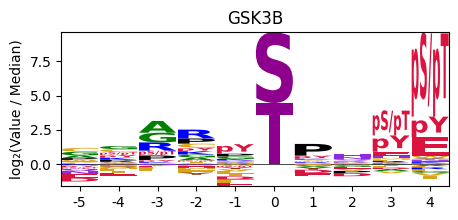

In [ ]:
plot_logo_pspa(pspa.loc['GSK3B'],title='GSK3B')

In [ ]:
#| export
def plot_logo_heatmap_pspa(row, # row of Data.get_pspa()
                       title='Motif',
                       figsize=(6,10),
                       include_zero=False
                      ):

    """Plot logo and heatmap vertically"""
    pssm = recover_pssm(row.dropna())
    
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 5], width_ratios=[4, 1], hspace=0.11, wspace=0)

    ax_logo = fig.add_subplot(gs[0, 0])
    
    logo_pssm = preprocess_pspa(pssm)
    plot_logo_raw(logo_pssm,ax=ax_logo, ytitle='log₂(Value / Median)',title=title)

    ax_heatmap = fig.add_subplot(gs[1, :])
    plot_heatmap(pssm,ax=ax_heatmap,position_label=False,include_zero=include_zero,colorbar_title='Value')

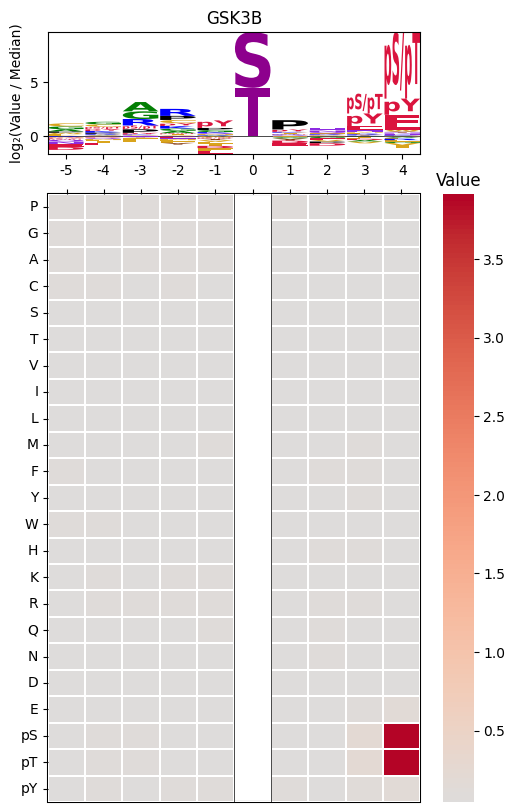

In [ ]:
plot_logo_heatmap_pspa(pspa.loc['GSK3B'],title='GSK3B')

## Others (old version)

In [ ]:
#| export
def raw2norm(df: pd.DataFrame, # single kinase's df has position as index, and single amino acid as columns
             PDHK: bool=False, # whether this kinase belongs to PDHK family 
            ):
    
    "Normalize single ST kinase data"
    columns_to_exclude = ['S', 'T', 'C', 't', 'y']
    
    if PDHK:
        columns_to_exclude.append('Y')
        divisor = 16
    else:
        divisor = 17
    
    s = df.drop(columns=columns_to_exclude).sum(1)
    df2 = df.div(s, axis=0)
    df2.C = df2.C / (df2.C.median() * divisor)
    df2['S'] = df2.drop(columns=columns_to_exclude).median(1)
    df2['T'] = df2.drop(columns=columns_to_exclude).median(1)
    df2 = round(df2, 4)
    
    return df2

This function implement the normalization method from [Johnson et al. Nature: An atlas of substrate specificities for the human serine/threonine kinome](https://www.nature.com/articles/s41586-022-05575-3#Sec6)

Specifically,
> - matrices were column-normalized at all positions by the sum of the 17 randomized amino acids (excluding serine, threonine and cysteine), to yield PSSMs. 
>- PDHK1 and PDHK4 were normalized to the 16 randomized amino acids (excluding serine, threonine, cysteine and additionally tyrosine)
>- The cysteine row was scaled by its median to be 1/17 (1/16 for PDHK1 and PDHK4). 
>- The serine and threonine values in each position were set to be the median of that position.
>- The S0/T0 ratio was determined by summing the values of S and T rows in the matrix (SS and ST, respectively), accounting for the different S vs. T composition of the central (1:1) and peripheral (only S or only T) positions (Sctrl and Tctrl, respectively), and then normalizing to the higher value among the two (S0 and T0, respectively, Supplementary Note 1)

This function is usually implemented with the below function, with `normalize` being a bool argument.

In [ ]:
#| export
def get_one_kinase(df: pd.DataFrame, #stacked dataframe (paper's raw data)
                   kinase:str, # a specific kinase
                   normalize: bool=False, # normalize according to the paper; special for PDHK1/4
                   drop_s: bool= True, # drop s as s is a duplicates of t in PSPA
                  ):
    "Obtain a specific kinase data from stacked dataframe"
    
    p = pd.DataFrame(df.loc[kinase],columns = [kinase]).reset_index().rename(columns={'index':'substrate'})
    p['position'] = p.substrate.str.extract(r'(-?\d+)')
    p['aa'] = p.substrate.str[-1]
    p.position = p.position.astype(int)
    pp = p.pivot(index='position', columns='aa', values=kinase)
    if drop_s:
        if 's' in pp.columns:
            pp = pp.drop(columns=['s'])

    if normalize:
        pp = raw2norm(pp, PDHK=True if kinase == 'PDHK1' or kinase == 'PDHK4' else False)
    return pp

Retreive a single kinase data from PSPA data that has an format of kinase as index and position+amino acid as column.

In [ ]:
data = Data.get_pspa_st()

In [ ]:
get_one_kinase(data,'PDHK1')

aa,A,C,D,E,F,G,H,I,K,L,...,P,Q,R,S,T,V,W,Y,t,y
position,,,,,,,,,,,,,,,,,,,,,
-5,0.0594,0.0625,0.0589,0.0550,0.0775,0.0697,0.0687,0.0590,0.0515,0.0657,...,0.0451,0.0424,0.0594,0.0594,0.0594,0.0573,0.1001,0.0775,0.0583,0.0658
-4,0.0618,0.0621,0.0550,0.0511,0.0739,0.0715,0.0598,0.0601,0.0520,0.0614,...,0.0637,0.0552,0.0617,0.0608,0.0608,0.0519,0.0916,0.0739,0.0528,0.0752
-3,0.0608,0.0576,0.0499,0.0423,0.0803,0.0580,0.0674,0.0687,0.0481,0.0667,...,0.0570,0.0532,0.0532,0.0584,0.0584,0.0588,0.1113,0.0803,0.0416,0.0553
-2,0.0587,0.0655,0.0470,0.0437,0.0790,0.0890,0.0787,0.0533,0.0440,0.0637,...,0.0500,0.0543,0.0616,0.0565,0.0565,0.0519,0.1082,0.0790,0.0327,0.0557
-1,0.0782,0.1009,0.0989,0.0426,0.0650,0.0695,0.0782,0.0496,0.0409,0.0578,...,0.0540,0.0500,0.0469,0.0594,0.0594,0.0514,0.0756,0.0650,0.0358,0.0433
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0000,0.4886,NaN,NaN,0.0000,0.4886,0.0000
1,0.0400,0.0562,0.0394,0.0355,0.0735,0.0400,0.0502,0.1288,0.0390,0.1439,...,0.0379,0.0455,0.0455,0.0455,0.0455,0.0797,0.0784,0.0735,0.0336,0.0452
2,0.0496,0.0783,0.0643,0.0555,0.0720,0.1067,0.0684,0.0480,0.0505,0.0555,...,0.0564,0.0653,0.0695,0.0601,0.0601,0.0508,0.0672,0.0720,0.0414,0.0594
3,0.0486,0.0609,0.0938,0.0684,0.1024,0.0676,0.0544,0.0583,0.0388,0.0552,...,0.0686,0.0502,0.0561,0.0588,0.0588,0.0593,0.0641,0.1024,0.0539,0.0431


In [ ]:
#| export
def get_logo(df: pd.DataFrame, # stacked Dataframe with kinase as index, substrates as columns
             kinase: str, # a specific kinase name in index
             ):
    "Given stacked df (index as kinase, columns as substrates), get a specific kinase's logo"
    
    
    # get raw kinase to calculate S/T
    pp = get_one_kinase(df,kinase,normalize=False)
    
    # get S/T ratio value
    ss = pp['S'].sum()
    st = pp['T'].sum()

    S_ctrl = 0.75*ss - 0.25*st
    T_ctrl = 0.75*st - 0.25*ss

    S0 = S_ctrl / max(S_ctrl, T_ctrl)
    T0 = T_ctrl / max(S_ctrl, T_ctrl)

    S_ratio = S0/(S0+T0)
    T_ratio = T0/(S0+T0)
    
    # get normalized kinase
    norm_p = get_one_kinase(df,kinase, normalize=True)
    
    # calculate ratio, divide values by median, followed by log2 transformation
    ratio =norm_p.apply(lambda r: r/r.median(),axis=1)
    ratio = np.log2(ratio)

    m = ratio.apply(lambda row: row[row > 0].sum(), axis=1).max()

    new_row = pd.DataFrame({'S': S_ratio*m, 'T':T_ratio*m}, index=[0]) 

    ratio2 = pd.concat([ratio, new_row], ignore_index=False).fillna(0)
    
    # plot logo
    # logo_func(ratio2, kinase)
    plot_logo_raw(ratio2.T,title=kinase,ytitle='log₂(Value / Median)')

This function is to replicate the motif logo from [Johnson et al. Nature: An atlas of substrate specificities for the human serine/threonine kinome](https://www.nature.com/articles/s41586-022-05575-3). Given raw PSPA data, it can output a motif logo.

In [ ]:
# load raw PSPA data
# df = pd.read_csv('https://github.com/sky1ove/katlas_raw/raw/refs/heads/main/nbs/raw/pspa_st_raw.csv').set_index('kinase')
# df.head()
# get_logo(df, 'AAK1')

Check imports: identify unused packages and any missing dependencies


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Looking at the imports in the setup cell:

```python
import numpy as np, pandas as pd
from katlas.pssm.plot import *
from matplotlib import pyplot as plt
from katlas.data import *
from katlas.pssm.core import *
```

**Used packages:**
- `np` (numpy) — used in `np.log2()` in `preprocess_pspa`
- `pd` (pandas) — used in `pd.DataFrame`, `pd.concat` in `get_logo`
- `plt` (matplotlib.pyplot) — used in `plt.figure()` in `plot_logo_heatmap_pspa`

**From `katlas.*` imports (used functions):**
- `plot_logo_raw` — used in `plot_logo_pspa`, `plot_logo_heatmap_pspa`, `get_logo`
- `plot_heatmap` — used in `plot_logo_heatmap_pspa`
- `Data` — used for `Data.get_pspa()`, `Data.get_pspa_st()`
- `recover_pssm` — used in `preprocess_pspa` and plot functions
- `change_center_name` — used in `preprocess_pspa`
- `scale_zero_position` — used in `preprocess_pspa`

**Potentially unused:**
- None of the explicitly imported packages appear unused

**Missing from explicit imports (relying on `*` imports):**
These functions are used but come from the `*` imports — they should ideally be explicit:
- `recover_pssm` — likely from `katlas.pssm.core`
- `change_center_name` — likely from `katlas.pssm.core`
- `scale_zero_position` — likely from `katlas.pssm.core`
- `plot_logo_raw` — likely from `katlas.pssm.plot`
- `plot_heatmap` — likely from `katlas.pssm.plot`
- `Data` — from `katlas.data`

**Recommendation:**
The imports look complete, but for clarity you might want to make the `*` imports explicit:

```python
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
from katlas.pssm.plot import plot_logo_raw, plot_heatmap
from katlas.pssm.core import recover_pssm, change_center_name, scale_zero_position
from katlas.data import Data
```

Would you like me to verify which module each function comes from?

## Export -

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()